In [17]:
# from functions import main, average_disc_vs_shop_bar, min_max_disc_vs_shop_bar, disc_vs_punct_linear, ini_rawg_API, create_rawg_df
%load_ext autoreload
%autoreload 2

from functions import *
from graphics import *

deals_df = main("https://www.cheapshark.com/api/1.0/deals")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
deals_df

,title,genre/s,shop,og_price,dc_price,discount_perc,metacritic
0,Football Manager 2024,"[Strategy, Simulation, Sports]",Epic Games Store,59.99,0.00,100.00,84.0
1,Sniper Ghost Warrior Contracts,"[Shooter, Action]",Epic Games Store,29.99,0.00,100.00,71.0
2,The Incredible Adventures of Van Helsing Antho...,[],GamersGate,74.99,5.63,92.49,0.0
3,Cycling Bundle 2021,[],GamersGate,69.58,7.83,88.75,0.0
4,Tennis World Tour Legends Edition,[],GamersGate,69.98,7.88,88.74,0.0
5,Assassin's Creed Odyssey - Deluxe Edition,[],Gamesplanet,79.99,11.19,86.01,0.0
6,Warhammer Age of Sigmar: Realms of Ruin Ultima...,[],IndieGala,74.99,12.29,83.61,0.0
7,Assassins Creed Origins Gold Edition,[],Gamesplanet,99.99,13.88,86.12,0.0
8,Assassins Creed Odyssey Gold Edition,[],Gamesplanet,99.99,13.99,86.01,0.0
9,BioShock Infinite,"[Shooter, Action]",WinGameStore,29.99,4.49,85.03,94.0


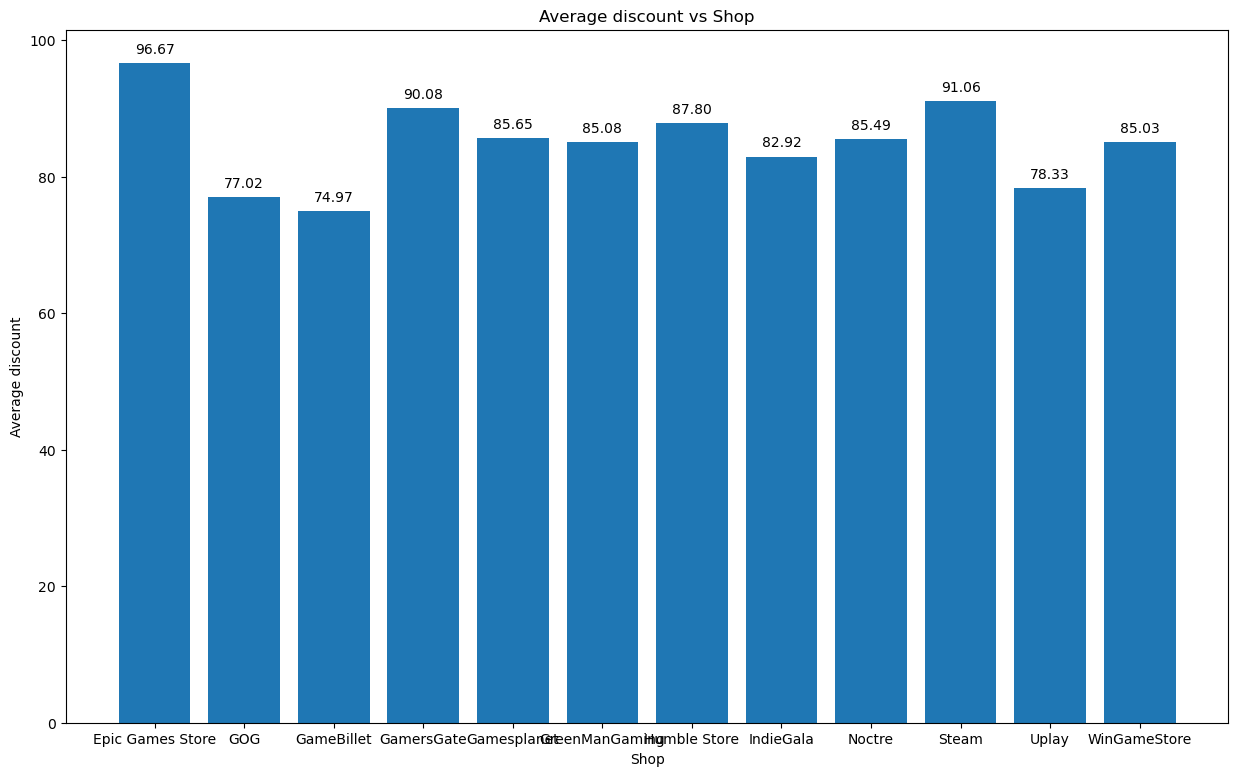

In [19]:
average_disc_vs_shop_bar(deals_df)

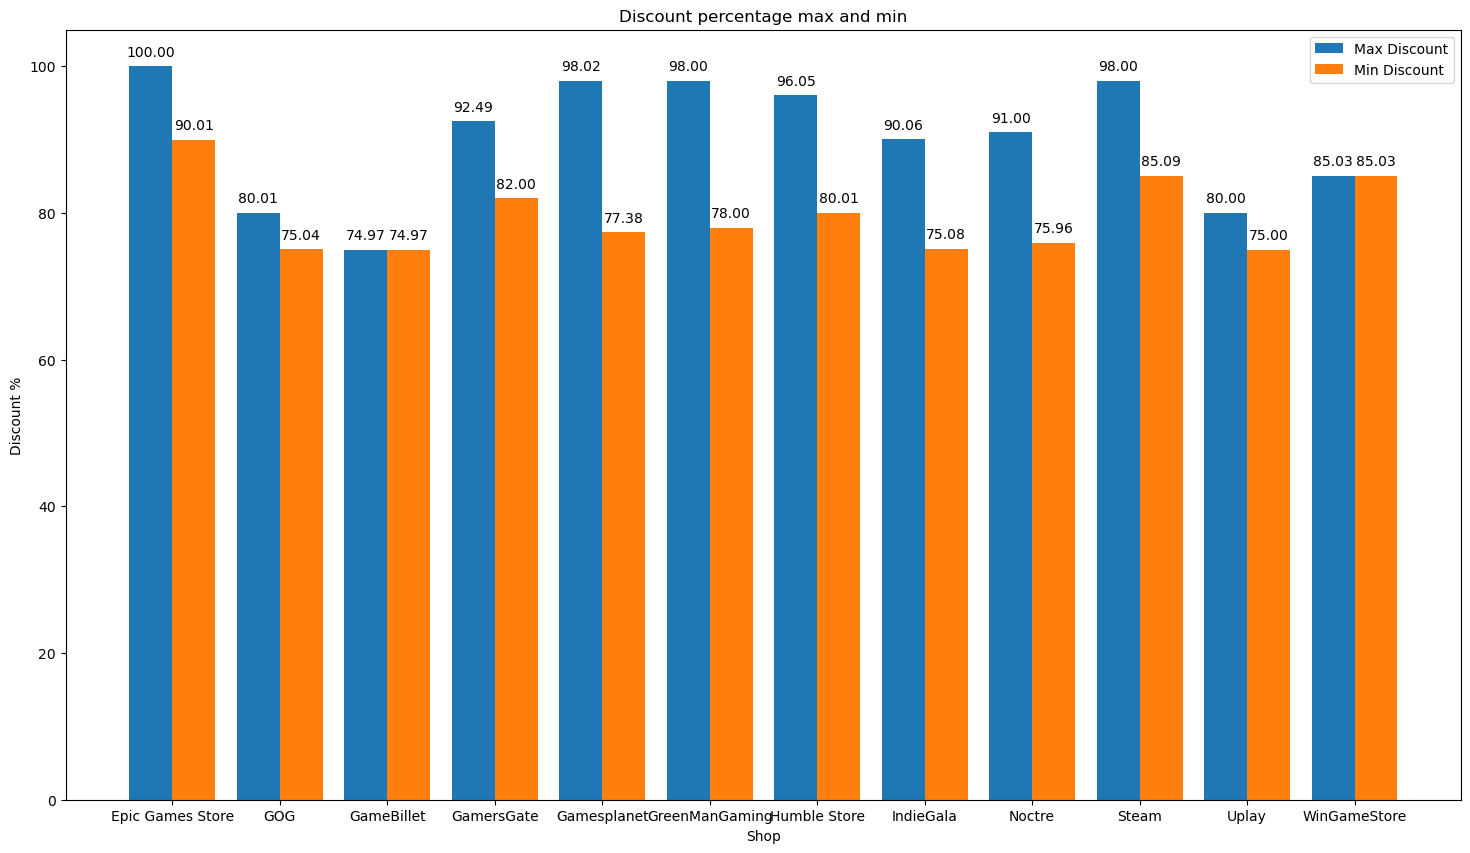

In [20]:
min_max_disc_vs_shop_bar(deals_df)

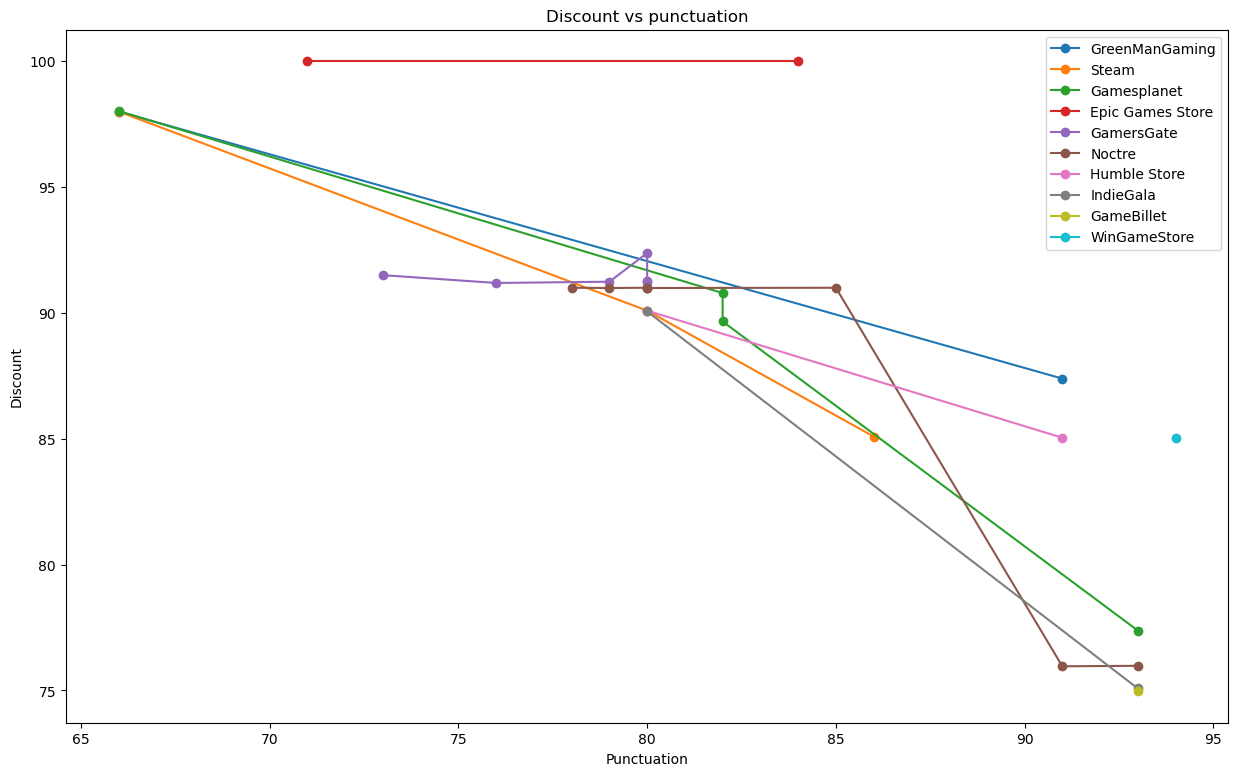

In [21]:
disc_vs_punct_linear(deals_df)

In [22]:
# for x in deals_df["title"]:

#     data_rawg = ini_rawg_API(x)

#     print(f"{x} --> {get_genre_list(data_rawg)}")

In [23]:
datooos = ini_rawg_API("Cycling Bundle")

x= get_genre_list(datooos)

x

TypeError: get_genre_list() missing 1 required positional argument: 'game_title'